# Bloco 2

<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 2. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michel </p>
<hr>

### **COLETA DE DADOS**

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from itertools import product
from matplotlib import pyplot as plt
from sklearn import tree

In [105]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [106]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [107]:
meses = read_csv(arquivos)

In [108]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [109]:
meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

In [110]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

In [111]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-12.314859,-43.234066,2022-03-02 01:05:48,9.0,2.7,1.0
1,-20.227880,-46.415940,2022-03-02 01:28:00,8.0,0.0,0.3
2,-20.229250,-46.426820,2022-03-02 01:28:00,8.0,0.0,0.3
3,-20.238930,-46.425510,2022-03-02 01:28:00,8.0,0.0,0.4
4,-20.237550,-46.414600,2022-03-02 01:28:00,8.0,0.0,0.4
...,...,...,...,...,...,...
265136,-6.360000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0
265137,-6.360000,-45.690000,2022-07-29 23:54:47,46.0,0.0,1.0
265138,-6.400000,-44.140000,2022-07-29 23:54:47,34.0,0.0,1.0
265139,-6.350000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0


<hr>

### **TREINO DE MODELOS NORMALIZADOS:**

In [112]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["risco_fogo"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

In [113]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

MinMaxScaler()

## Baseline

In [114]:
# cria o modelo
modelo_baseline = DummyRegressor()
# treina o modelo
modelo_baseline.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(normalizador_x.transform(X_treino))
#previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[0.84847435 0.84847435 0.84847435 ... 0.84847435 0.84847435 0.84847435]


In [115]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))
#y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}")

O RMSE do modelo linear foi de 0.25423701029201057


## K-vizinhos mais próximos

In [116]:
# cria o modelo
modelo_knm = KNeighborsRegressor()

# treina o modelo
modelo_knm.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[1.  ]
 [1.  ]
 [0.97]
 ...
 [1.  ]
 [0.98]
 [1.  ]]


In [117]:
NUM_VIZINHOS = [1, 5, 10, 15, 20]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knm.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))
    y_verdadeiro = y_teste
    y_previsao = modelo_knm.predict(normalizador_x.transform(X_teste))
    y_previsao = normalizador_y.inverse_transform(y_previsao)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo linear foi de {RMSE} com {n} vizinhos.")

O RMSE do modelo linear foi de 0.08759935110152076 com 1 vizinhos.
O RMSE do modelo linear foi de 0.08759935110152076 com 5 vizinhos.
O RMSE do modelo linear foi de 0.08759935110152076 com 10 vizinhos.
O RMSE do modelo linear foi de 0.08759935110152076 com 15 vizinhos.
O RMSE do modelo linear foi de 0.08759935110152076 com 20 vizinhos.


## Modelo de Regressão Linear

In [118]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[0.88141621]
 [0.81105356]
 [0.85321921]
 ...
 [0.8747693 ]
 [0.87064896]
 [0.88084116]]


In [119]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[0.88141621]
 [0.81105356]
 [0.85321921]
 ...
 [0.8747693 ]
 [0.87064896]
 [0.88084116]]


## Árvore de Decisão

In [120]:
# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(normalizador_x.transform(X_treino))
#previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[1.         1.         0.96969697 ... 1.         1.         1.        ]


In [121]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
#y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 0.08196837971262753.


#### HIPERPARÂMETROS

In [123]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
    #y_previsao = normalizador_y.inverse_transform(y_previsao)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


#### GRÁFICO DO MODELO DE ÁRVORE DE DECISÕES

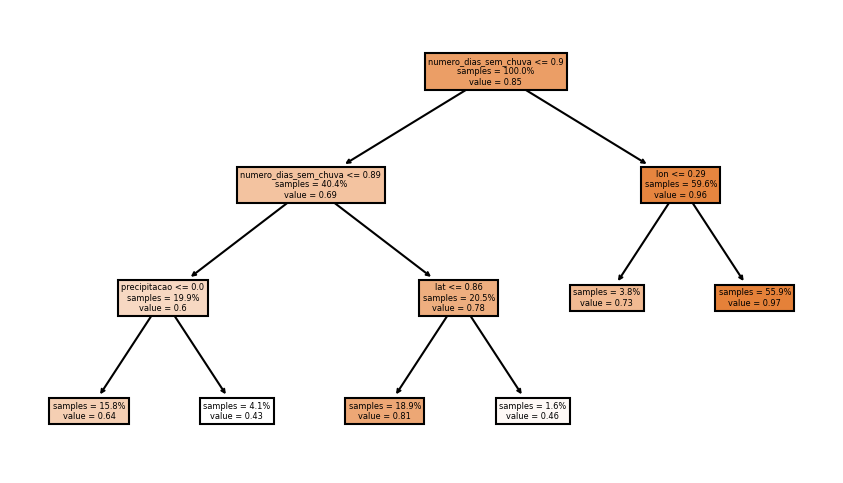

In [124]:
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

## Floresta aleatória

*a ser feito*

*a ser feito*

<hr>

### **TREINO DE MODELOS NÃO - NORMALIZADOS:**

## Baseline

In [130]:
# cria o modelo
modelo_baseline = DummyRegressor()
# treina o modelo
modelo_baseline.fit(X_treino, y_treino)
# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)
print(previsao)

[0.84998961 0.84998961 0.84998961 ... 0.84998961 0.84998961 0.84998961]


In [131]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 0.2542253273416988.


## K-vizinhos mais próximos

In [132]:
NUM_VIZINHOS = [1, 5, 10, 15, 20]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)
    
    modelo_knn.fit(X_treino, y_treino)
    
    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)

    RMSE_knn = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(f"O RMSE do modelo k-NN foi de {RMSE_knn} com {n} vizinhos.")

O RMSE do modelo k-NN foi de 0.08039338505468364 com 1 vizinhos.
O RMSE do modelo k-NN foi de 0.09618881660830106 com 5 vizinhos.
O RMSE do modelo k-NN foi de 0.10954420439863449 com 10 vizinhos.
O RMSE do modelo k-NN foi de 0.11919214194856101 com 15 vizinhos.
O RMSE do modelo k-NN foi de 0.12525708121497037 com 20 vizinhos.


## Modelo de Regressão Linear

In [133]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[0.84295707 0.77932213 0.83871419 ... 0.90402853 0.85529304 0.88978477]


In [134]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 0.23769024621130788.


## Árvore de Decisão

In [135]:
# cria o modelo
modelo_ad = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad = modelo_ad.predict(X_teste)
print(previsao_ad)

[0.8  0.69 0.92 ... 1.   1.   1.  ]


In [136]:
y_verdadeiro = y_teste
y_previsao = modelo_ad.predict(X_teste)

RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad}.")

O RMSE do modelo árvore de decisão foi de 0.08121002222868678.


In [137]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_ad.predict(X_teste)
    RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


#### MUDANDO OS HIPERPARÂMETROS

In [141]:
NUM_FOLHAS = [None, 4, 24]
NUM_PROFUNDIDADE = [None, 2, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad2 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad2.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_ad2.predict(X_teste)
    RMSE_ad2 = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad2:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


## Floresta aleatória

In [ ]:
# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_fa = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_fa.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_fa = modelo_fa.predict(X_teste)
print()
print(previsao_fa)

(238626,) (26515,)
(238626,) (26515,)


In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_fa.predict(X_teste)

RMSE_fa = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de floresta aleatória foi de {RMSE_fa}.")